In [1]:
import pandas as pd
import numpy as np
import geopandas
import shapely
from matplotlib import pyplot as plt

In [2]:
name_csv = "checkins_Nebraska.csv"

In [3]:
df = pd.read_csv("./checkins_separated/"+name_csv)

In [4]:
df

,userid,placeid,datetime,id,created_at,lng,lat,photos_count,checkins_count,users_count,radius_meters,highlights_count,items_count,max_items_count,spot_categories,geometry,index_right,NAME
0,1338,722646,2010-12-24T23:52:54Z,722646,2010-03-16T18:20:30Z,-99.095979,40.713307,0,15,4,100,0,1,10,"[{'url': '/categories/68', 'name': 'Contempora...",POINT (-99.09597939 40.71330702),17.0,Nebraska
1,1338,722646,2010-04-04T15:59:23Z,722646,2010-03-16T18:20:30Z,-99.095979,40.713307,0,15,4,100,0,1,10,"[{'url': '/categories/68', 'name': 'Contempora...",POINT (-99.09597939 40.71330702),17.0,Nebraska
2,162577,722646,2010-05-13T19:25:37Z,722646,2010-03-16T18:20:30Z,-99.095979,40.713307,0,15,4,100,0,1,10,"[{'url': '/categories/68', 'name': 'Contempora...",POINT (-99.09597939 40.71330702),17.0,Nebraska
3,162577,722646,2010-04-18T15:24:05Z,722646,2010-03-16T18:20:30Z,-99.095979,40.713307,0,15,4,100,0,1,10,"[{'url': '/categories/68', 'name': 'Contempora...",POINT (-99.09597939 40.71330702),17.0,Nebraska
4,162577,722646,2010-04-11T12:30:45Z,722646,2010-03-16T18:20:30Z,-99.095979,40.713307,0,15,4,100,0,1,10,"[{'url': '/categories/68', 'name': 'Contempora...",POINT (-99.09597939 40.71330702),17.0,Nebraska
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21779,2117965,6524936,2010-12-02T01:14:12Z,6524936,2010-12-02T01:14:01Z,-96.632487,40.764541,0,1,1,75,0,0,10,"[{'url': '/categories/59', 'name': 'Other - Ar...",POINT (-96.632487 40.764541),17.0,Nebraska
21780,72367,304191,2010-01-23T23:15:14Z,304191,2009-12-31T21:54:00Z,-97.080045,40.897838,0,3,2,100,0,0,10,"[{'url': '/categories/65', 'name': 'Church'}]",POINT (-97.0800447464 40.8978383971),17.0,Nebraska
21781,72367,304191,2009-12-31T21:55:07Z,304191,2009-12-31T21:54:00Z,-97.080045,40.897838,0,3,2,100,0,0,10,"[{'url': '/categories/65', 'name': 'Church'}]",POINT (-97.0800447464 40.8978383971),17.0,Nebraska
21782,72367,291189,2009-12-30T20:14:42Z,291189,2009-12-29T19:55:59Z,-96.988667,40.943902,0,2,1,100,0,0,10,"[{'url': '/categories/38', 'name': 'City Park'}]",POINT (-96.9886672497 40.943901622),17.0,Nebraska


In [5]:
df["time"] = pd.to_datetime(df["datetime"], format="%Y-%m-%dT%H:%M:%SZ")

In [6]:
df["hour"] = df["time"].dt.hour
df["minute"] = df["time"].dt.minute
df["weekday"] = df["time"].dt.weekday
df["timeslot"] = df.apply(lambda x: max(x["hour"]*2-1, 0) if x["minute"] < 30 else x["hour"]+1, axis=1)
df["day"] = df["time"].dt.day_of_year
df["year"] = df["time"].dt.year

In [7]:
df = df.drop_duplicates(subset=["userid", "timeslot", "day"], keep="last").reset_index(drop=True)

In [8]:
df["rank"] = df.groupby("userid")["day"].rank(method="dense", ascending=True)

In [9]:
df["userid"].unique()

array([  1338, 162577, 174066, ...,  56573, 147845, 323425])

In [10]:
# transformar a coluna rank em inteiro
df["rank"] = df["rank"].astype(int)
df

,userid,placeid,datetime,id,created_at,lng,lat,photos_count,checkins_count,users_count,...,index_right,NAME,time,hour,minute,weekday,timeslot,day,year,rank
0,1338,722646,2010-12-24T23:52:54Z,722646,2010-03-16T18:20:30Z,-99.095979,40.713307,0,15,4,...,17.0,Nebraska,2010-12-24 23:52:54,23,52,4,24,358,2010,5
1,1338,722646,2010-04-04T15:59:23Z,722646,2010-03-16T18:20:30Z,-99.095979,40.713307,0,15,4,...,17.0,Nebraska,2010-04-04 15:59:23,15,59,6,16,94,2010,1
2,162577,722646,2010-05-13T19:25:37Z,722646,2010-03-16T18:20:30Z,-99.095979,40.713307,0,15,4,...,17.0,Nebraska,2010-05-13 19:25:37,19,25,3,37,133,2010,22
3,162577,722646,2010-04-18T15:24:05Z,722646,2010-03-16T18:20:30Z,-99.095979,40.713307,0,15,4,...,17.0,Nebraska,2010-04-18 15:24:05,15,24,6,29,108,2010,20
4,162577,722646,2010-04-11T12:30:45Z,722646,2010-03-16T18:20:30Z,-99.095979,40.713307,0,15,4,...,17.0,Nebraska,2010-04-11 12:30:45,12,30,6,13,101,2010,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17197,2117965,6524936,2010-12-02T01:14:12Z,6524936,2010-12-02T01:14:01Z,-96.632487,40.764541,0,1,1,...,17.0,Nebraska,2010-12-02 01:14:12,1,14,3,1,336,2010,14
17198,72367,304191,2010-01-23T23:15:14Z,304191,2009-12-31T21:54:00Z,-97.080045,40.897838,0,3,2,...,17.0,Nebraska,2010-01-23 23:15:14,23,15,5,45,23,2010,3
17199,72367,304191,2009-12-31T21:55:07Z,304191,2009-12-31T21:54:00Z,-97.080045,40.897838,0,3,2,...,17.0,Nebraska,2009-12-31 21:55:07,21,55,3,22,365,2009,6
17200,72367,291189,2009-12-30T20:14:42Z,291189,2009-12-29T19:55:59Z,-96.988667,40.943902,0,2,1,...,17.0,Nebraska,2009-12-30 20:14:42,20,14,2,39,364,2009,5


<Axes: ylabel='Frequency'>

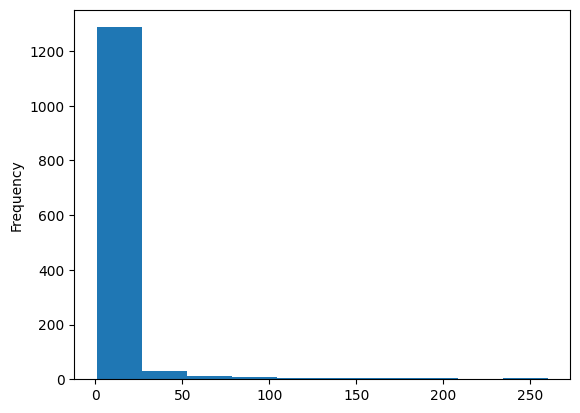

In [11]:
df.groupby("userid")["rank"].max().plot(kind="hist", bins=10)

In [12]:
df["userid"].nunique()

1359

In [13]:

train = df.copy()
train = df[df["userid"].isin((df.groupby("userid")["rank"].max().sort_values(ascending=False).reset_index().query("rank >= 13").userid.tolist()))]
train

,userid,placeid,datetime,id,created_at,lng,lat,photos_count,checkins_count,users_count,...,index_right,NAME,time,hour,minute,weekday,timeslot,day,year,rank
2,162577,722646,2010-05-13T19:25:37Z,722646,2010-03-16T18:20:30Z,-99.095979,40.713307,0,15,4,...,17.0,Nebraska,2010-05-13 19:25:37,19,25,3,37,133,2010,22
3,162577,722646,2010-04-18T15:24:05Z,722646,2010-03-16T18:20:30Z,-99.095979,40.713307,0,15,4,...,17.0,Nebraska,2010-04-18 15:24:05,15,24,6,29,108,2010,20
4,162577,722646,2010-04-11T12:30:45Z,722646,2010-03-16T18:20:30Z,-99.095979,40.713307,0,15,4,...,17.0,Nebraska,2010-04-11 12:30:45,12,30,6,13,101,2010,17
5,162577,722646,2010-04-06T22:28:42Z,722646,2010-03-16T18:20:30Z,-99.095979,40.713307,0,15,4,...,17.0,Nebraska,2010-04-06 22:28:42,22,28,1,43,96,2010,13
6,162577,722646,2010-04-04T14:54:20Z,722646,2010-03-16T18:20:30Z,-99.095979,40.713307,0,15,4,...,17.0,Nebraska,2010-04-04 14:54:20,14,54,6,15,94,2010,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17189,157093,975502,2010-04-19T16:32:49Z,975502,2010-04-19T16:32:11Z,-96.609971,40.827703,0,2,2,...,17.0,Nebraska,2010-04-19 16:32:49,16,32,0,17,109,2010,13
17190,157093,931017,2010-04-13T01:18:07Z,931017,2010-04-13T01:17:57Z,-96.653240,40.810262,0,1,1,...,17.0,Nebraska,2010-04-13 01:18:07,1,18,1,1,103,2010,12
17191,157093,862021,2010-04-03T15:57:31Z,862021,2010-04-03T15:56:53Z,-96.624382,40.757709,0,1,1,...,17.0,Nebraska,2010-04-03 15:57:31,15,57,5,16,93,2010,10
17196,2117965,6750226,2011-01-13T22:04:46Z,6750226,2011-01-13T22:04:40Z,-96.673017,40.828012,0,1,1,...,17.0,Nebraska,2011-01-13 22:04:46,22,4,3,43,13,2011,3


In [14]:
gdf = geopandas.GeoDataFrame(train, geometry=geopandas.points_from_xy(x=train.lng, y=train.lat))

<Axes: >

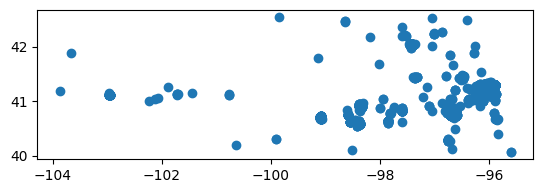

In [15]:
gdf.plot()

In [16]:
xmin, ymin, xmax, ymax= gdf.total_bounds
# how many cells across and down
n_cells=199
cell_size = (xmax-xmin)/n_cells
# projection of the grid
crs = "+proj=sinu +lon_0=0 +x_0=0 +y_0=0 +a=6371007.181 +b=6371007.181 +units=m +no_defs"
# create the cells in a loop
grid_cells = []
for n1, x0 in enumerate(np.arange(xmin, xmax+cell_size, cell_size)):
    for n2, y0 in enumerate(np.arange(ymin, ymax+cell_size, cell_size)):
        # bounds
        x1 = x0-cell_size
        y1 = y0+cell_size
        grid_cells.append([shapely.geometry.box(x0, y0, x1, y1), n1, n2])
cell = geopandas.GeoDataFrame(grid_cells, columns=['geometry', 'x', 'y'])

In [17]:
cell["id"] = range(len(cell))

(-104.28316676, -95.18789244, 39.93414131085, 42.67364047215)

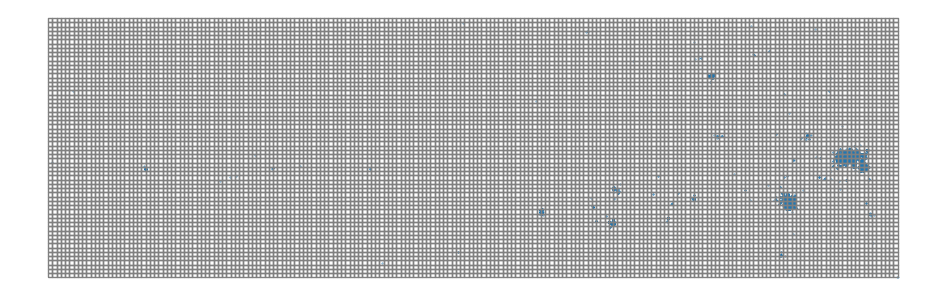

In [18]:
ax = gdf.plot(markersize=.1, figsize=(12, 8))
plt.autoscale(False)
cell.plot(ax=ax, facecolor="none", edgecolor='grey')
ax.axis("off")

In [19]:
cell

,geometry,x,y,id
0,"POLYGON ((-103.91130 40.05866, -103.91130 40.1...",0,0,0
1,"POLYGON ((-103.91130 40.10021, -103.91130 40.1...",0,1,1
2,"POLYGON ((-103.91130 40.14176, -103.91130 40.1...",0,2,2
3,"POLYGON ((-103.91130 40.18331, -103.91130 40.2...",0,3,3
4,"POLYGON ((-103.91130 40.22486, -103.91130 40.2...",0,4,4
...,...,...,...,...
12195,"POLYGON ((-95.64286 42.38546, -95.64286 42.427...",199,56,12195
12196,"POLYGON ((-95.64286 42.42701, -95.64286 42.468...",199,57,12196
12197,"POLYGON ((-95.64286 42.46856, -95.64286 42.510...",199,58,12197
12198,"POLYGON ((-95.64286 42.51011, -95.64286 42.551...",199,59,12198


In [20]:
merged = geopandas.sjoin(gdf.drop(["index_right"], axis=1), cell, how='left', op='within')

/home/alvaro/Documentos/GitHub/LP-BERT/lpbert/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3517: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [21]:
train = merged[["userid", "timeslot", "rank", "x", "y"]]
train = train.sort_values(by=['userid','rank', 'timeslot'])
train = train.dropna()

In [22]:
train.rename(columns={'timeslot':'t'}, inplace=True)
train.rename(columns={'rank':'d'}, inplace=True)
train.rename(columns={'userid': 'uid'}, inplace=True)
train
# train = train.astype(dtype = {'uid': 'int64', 't': 'int64', 'd': 'int64', 'x': 'int64', 'y': 'int64'})

,uid,t,d,x,y
10541,370,45,1,191.0,28.0
10539,370,37,2,173.0,18.0
130,370,17,3,192.0,29.0
6354,370,22,4,192.0,28.0
2907,370,27,4,192.0,28.0
...,...,...,...,...,...
9788,2546252,27,14,173.0,18.0
14256,2546252,4,15,175.0,16.0
14255,2546252,5,16,175.0,16.0
14252,2546252,15,17,175.0,19.0


In [23]:
train = train.astype(dtype = {'uid': 'int64', 't': 'int64', 'd': 'int64', 'x': 'int64', 'y': 'int64'})
train

,uid,t,d,x,y
10541,370,45,1,191,28
10539,370,37,2,173,18
130,370,17,3,192,29
6354,370,22,4,192,28
2907,370,27,4,192,28
...,...,...,...,...,...
9788,2546252,27,14,173,18
14256,2546252,4,15,175,16
14255,2546252,5,16,175,16
14252,2546252,15,17,175,19


In [24]:
quartis = train.quantile([0.25, 0.5, 0.75])
quartis['d']
# first_quartil = quartis.loc[0.25, 'd']
# first_quartil

0.25    16.0
0.50    42.0
0.75    86.0
Name: d, dtype: float64

In [25]:
count = train.groupby('uid').size().reset_index(name='counts')
filtered_uids = count.query('counts <= 128')['uid']
filtered_df = train[train['uid'].isin(filtered_uids)]

In [26]:
test_size = 0.25
test_count = int(len(filtered_df) * test_size)

train = filtered_df.sort_values(by=['uid', 'd', 't'])

df_train = train[:-test_count]
df_test = train[-test_count:]

# from sklearn.model_selection import train_test_split

# df_train, df_testft = train_test_split(train, test_size=0.2, random_state=42)
# df_sorted = train.sort_values(by=['uid', 'd', 't'])
# df_train = df_sorted[df_sorted['d'] <= 20]
# df_test = df_sorted[df_sorted['d'] > 20]
# df_train

In [27]:
df_aux = df_test.sort_values(by=['uid','d','t'])
df_test = df_aux[df_aux['d'] <= 13]
df_test_final = df_aux[df_aux['d'] > 13]
df_test_final = df_test_final[df_test_final["uid"].isin((df_test_final.groupby("uid")["d"].max().sort_values(ascending=False).reset_index().query("d >= 25").uid.tolist()))]
df_train = pd.concat([df_train, df_test])
df_test

,uid,t,d,x,y
10586,2145458,14,1,192,28
135,2145458,39,2,192,29
10600,2145458,17,3,192,28
1240,2145458,24,4,192,28
6472,2145458,41,5,191,29
...,...,...,...,...,...
14258,2546252,7,9,175,16
14253,2546252,43,10,175,19
9789,2546252,27,11,173,18
14257,2546252,3,12,175,16


In [28]:
train_csv = "train/train2_" + name_csv
test_csv = "test/test2_" + name_csv

In [29]:
df_train.to_csv(train_csv, index=False)
df_test_final.to_csv(test_csv, index=False)